In [1]:
# import the libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# load and check the shape of train data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.shape

(42000, 785)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
# load and check the shape of test data
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test.shape

(28000, 784)

In [5]:
# Data preparation
X = train.drop(['label'], axis = 1)
y = train['label']

In [6]:
# scale the images betwee 0 and 1 by dividing the pixels by 255

X = X.astype('float32') / 255
test = test.astype('float32') / 255

In [7]:
# split the train data into train and validation set

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [8]:
# make a generic single layer Neural Network

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')])

# compile the model

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs= 5)

2022-03-30 01:04:31.581745: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-30 01:04:31.897286: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5577 - accuracy: 0.8587
Epoch 2/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3257 - accuracy: 0.9092
Epoch 3/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2935 - accuracy: 0.9179
Epoch 4/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2778 - accuracy: 0.9224
Epoch 5/5
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2684 - accuracy: 0.9244


In [9]:
# add hidden layers in the Neural Network
model = keras.Sequential([
    keras.layers.Dense(200, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')])

# compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2962 - accuracy: 0.9149
Epoch 2/5
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1278 - accuracy: 0.9629
Epoch 3/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0844 - accuracy: 0.9757
Epoch 4/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0610 - accuracy: 0.9822
Epoch 5/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0448 - accuracy: 0.9865


In [10]:
# validate the results

# make predictions on validation data(this will provide scores for each of the ten values from 0-10)
predictions = model.predict(X_validation)

# select the max values from each prediction array
predictions_val = [np.argmax(i) for i in predictions]

#predictions_val


In [11]:
# create the confusion matrix to check the results
confusion_matrix = tf.math.confusion_matrix(labels = y_validation, predictions = predictions_val)

<AxesSubplot:>

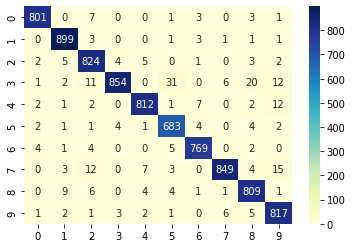

In [12]:
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cmap="YlGnBu")

In [13]:
# get the score of the model

score = model.evaluate(X_validation, y_validation)

print("Validation loss:", score[0])
print("Validation accuracy:", score[1])

263/263 [==============================] - 1s 1ms/step - loss: 0.1041 - accuracy: 0.9663
Validation loss: 0.10406646132469177
Validation accuracy: 0.9663095474243164
